# BANCO BASE - EJERCICIO 1 

__30 de marzo del 2022__

Se genera el siguiente Notebook para dar respuesta a los siguientes puntos del Ejercicio 1:
    
> 1.1. ¿En qué horarios hay mayor afluencia y en qué estaciones? 
    
> 1.2. Usa un método de aprendizaje no supervisado para encontrar perfiles de uso de las estaciones. Lo que debes hacer es categorizar a las estaciones en diferentes grupos a partir de su comportamiento de entradas, salidas y tipo de usuarios.

> 1.3. Usa un modelo estadístico paramétrico para que, a partir de un análisis temporal, contestes lo siguiente:



### Importar archivos

Se importan tres archivos .csv de manera independiente, esto porque es necesario primero ver el contenido de cada archivo 

In [1]:
%%time
import os
pathy =os.getcwd() 
print(os.getcwd())

/ejercicios/Ejercicio1
CPU times: user 223 µs, sys: 13 µs, total: 236 µs
Wall time: 186 µs


In [2]:
%%time
import pandas as pd
import glob

path_in = pathy +  '/input' # el path donde se encuantran los archivos .cvs a importar 
path_out = pathy + '/output' # el path donde se exportan archivos 
files = glob.glob(path_in + "/*.csv") # se pasan los paths de cada archivo a una lista 
print(path_in)
dfs = []

for file in files:
    df = pd.read_csv(file)
    print(df.shape)
    dfs.append(df)

/ejercicios/Ejercicio1/input
(354267, 9)
(345209, 9)
(414881, 9)
CPU times: user 1.52 s, sys: 359 ms, total: 1.88 s
Wall time: 1.54 s


### Descripción de los datasets

Los datasets fueron tomados del sitio ecobici: https://www.ecobici.cdmx.gob.mx/es/informacion-del-servicio/open-data
    
Cada dataset contiene los mismos atributos, los cuales se describen a continuación: 
    
- __Genero_Usuario:__ el género del usuario (solo dos valores para masculino y femenino) 	
- __Edad_Usuario:__ la edad del usuario
- __Bici:__ el No de bicicleta 
- __Ciclo_Estacion_Retiro:__ el número de la estación de la cual se toma la bicicleta 	
- __Fecha_Retiro_:__ la fecha en que se retira la bicicleta
- __Hora_Retiro:__ la hora en que se retira la bicicleta
- __Ciclo_EstacionArribo:__ el número de estación en que se regresa la bicicleta
- __Fecha Arribo:__ la fecha en que se regresa la bicicleta
- __Hora_Arribo:__ la hora en que se regresa la bicicleta

### Información General de DFs

Se explora el contenido de los archivos para ver los atributos, el tipo de datos y los valores null en cada uno de los atributos

In [3]:
%%time

df.head()

CPU times: user 428 µs, sys: 0 ns, total: 428 µs
Wall time: 267 µs


Genero_Usuario  Edad_Usuario   Bici  Ciclo_Estacion_Retiro Fecha_Retiro  \
0              F            48  11089                     66   30/09/2021   
1              M            28  11622                     27   30/09/2021   
2              M            36  10861                     68   30/09/2021   
3              M            34   9708                     68   30/09/2021   
4              M            29  11235                     27   30/09/2021   

  Hora_Retiro  Ciclo_EstacionArribo Fecha Arribo Hora_Arribo  
0    15:22:09                    45   01/10/2021    00:00:24  
1    23:41:19                   168   01/10/2021    00:00:35  
2    23:38:37                    68   01/10/2021    00:01:04  
3    23:38:07                    68   01/10/2021    00:01:10  
4    23:57:54                    27   01/10/2021    00:01:17

In [4]:
%%time

dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354267 entries, 0 to 354266
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Genero_Usuario         335459 non-null  object 
 1   Edad_Usuario           343183 non-null  float64
 2   Bici                   343183 non-null  float64
 3   Ciclo_Estacion_Retiro  343183 non-null  float64
 4   Fecha_Retiro           343183 non-null  object 
 5   Hora_Retiro            343183 non-null  object 
 6   Ciclo_EstacionArribo   343183 non-null  float64
 7   Fecha Arribo           343183 non-null  object 
 8   Hora_Arribo            343183 non-null  object 
dtypes: float64(4), object(5)
memory usage: 24.3+ MB
CPU times: user 195 ms, sys: 0 ns, total: 195 ms
Wall time: 191 ms


In [5]:
%%time

dfs[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345209 entries, 0 to 345208
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Genero_Usuario         338354 non-null  object
 1   Edad_Usuario           345209 non-null  int64 
 2   Bici                   345209 non-null  int64 
 3   Ciclo_Estacion_Retiro  345209 non-null  int64 
 4   Fecha_Retiro           345209 non-null  object
 5   Hora_Retiro            345209 non-null  object
 6   Ciclo_EstacionArribo   345209 non-null  int64 
 7   Fecha Arribo           345209 non-null  object
 8   Hora_Arribo            345209 non-null  object
dtypes: int64(4), object(5)
memory usage: 23.7+ MB
CPU times: user 208 ms, sys: 0 ns, total: 208 ms
Wall time: 205 ms


In [6]:
%%time

dfs[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414881 entries, 0 to 414880
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Genero_Usuario         403518 non-null  object
 1   Edad_Usuario           414881 non-null  int64 
 2   Bici                   414881 non-null  int64 
 3   Ciclo_Estacion_Retiro  414881 non-null  int64 
 4   Fecha_Retiro           414881 non-null  object
 5   Hora_Retiro            414881 non-null  object
 6   Ciclo_EstacionArribo   414881 non-null  int64 
 7   Fecha Arribo           414881 non-null  object
 8   Hora_Arribo            414881 non-null  object
dtypes: int64(4), object(5)
memory usage: 28.5+ MB
CPU times: user 229 ms, sys: 0 ns, total: 229 ms
Wall time: 225 ms


### Concatenar archivos

Una vez que se han validado los atributos de los tres archvios, se concatena la lista de DataFrames a un solo DataFrame para facilitar el manejo de los datos

In [7]:
%%time

df = pd.concat(dfs, axis=0, ignore_index=True)

# para validar el tamaño del archivo concatenado contra la suma de los tres archivos importados
print('Suma de archivos separados: ', dfs[0].shape[0] + dfs[1].shape[0] + dfs[2].shape[0])
print('Archivo concatenado', df.shape)

Suma de archivos separados:  1114357
Archivo concatenado (1114357, 9)
CPU times: user 69 ms, sys: 31.8 ms, total: 101 ms
Wall time: 96.9 ms


In [8]:
%%time

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114357 entries, 0 to 1114356
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Genero_Usuario         1077331 non-null  object 
 1   Edad_Usuario           1103273 non-null  float64
 2   Bici                   1103273 non-null  float64
 3   Ciclo_Estacion_Retiro  1103273 non-null  float64
 4   Fecha_Retiro           1103273 non-null  object 
 5   Hora_Retiro            1103273 non-null  object 
 6   Ciclo_EstacionArribo   1103273 non-null  float64
 7   Fecha Arribo           1103273 non-null  object 
 8   Hora_Arribo            1103273 non-null  object 
dtypes: float64(4), object(5)
memory usage: 76.5+ MB
CPU times: user 609 ms, sys: 0 ns, total: 609 ms
Wall time: 605 ms


### Llenar valores nan

Se decide reemplazar valores null en el atributo Genero Usuario, lo anterio debido a que es el atributo con el mayor número de valore null, y al quitar estos valores, se pierde información que se considera siginificativa. El valor se reemplaza por una "N" que representa neutro. 

In [9]:
%%time

# valores null en atributo "Genero Usuario"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114357 entries, 0 to 1114356
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Genero_Usuario         1077331 non-null  object 
 1   Edad_Usuario           1103273 non-null  float64
 2   Bici                   1103273 non-null  float64
 3   Ciclo_Estacion_Retiro  1103273 non-null  float64
 4   Fecha_Retiro           1103273 non-null  object 
 5   Hora_Retiro            1103273 non-null  object 
 6   Ciclo_EstacionArribo   1103273 non-null  float64
 7   Fecha Arribo           1103273 non-null  object 
 8   Hora_Arribo            1103273 non-null  object 
dtypes: float64(4), object(5)
memory usage: 76.5+ MB
CPU times: user 601 ms, sys: 0 ns, total: 601 ms
Wall time: 598 ms


### Genero Usuario sin valores Null

In [10]:
%%time

df['Genero_Usuario'].fillna('N', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114357 entries, 0 to 1114356
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Genero_Usuario         1114357 non-null  object 
 1   Edad_Usuario           1103273 non-null  float64
 2   Bici                   1103273 non-null  float64
 3   Ciclo_Estacion_Retiro  1103273 non-null  float64
 4   Fecha_Retiro           1103273 non-null  object 
 5   Hora_Retiro            1103273 non-null  object 
 6   Ciclo_EstacionArribo   1103273 non-null  float64
 7   Fecha Arribo           1103273 non-null  object 
 8   Hora_Arribo            1103273 non-null  object 
dtypes: float64(4), object(5)
memory usage: 76.5+ MB
CPU times: user 630 ms, sys: 0 ns, total: 630 ms
Wall time: 626 ms


### Reemplazar los demás valores null 

A partir de las distribuciones mostradas en las gráficas siguientes, se decide reemplazar los valores de los atributos: Edad_Usuario, Bici y Ciclo_EstacionArribo

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CPU times: user 4.47 s, sys: 746 ms, total: 5.21 s
Wall time: 4.05 s


<AxesSubplot:xlabel='Edad_Usuario', ylabel='Density'>

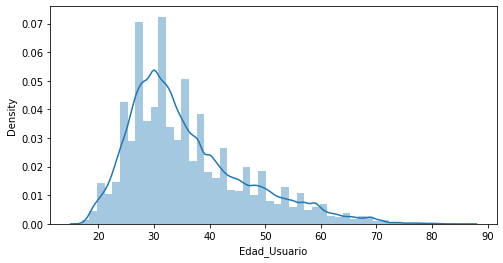

In [11]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (8, 4))
sns.distplot(df['Edad_Usuario'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CPU times: user 3.44 s, sys: 348 ms, total: 3.79 s
Wall time: 3.1 s


<AxesSubplot:xlabel='Bici', ylabel='Density'>

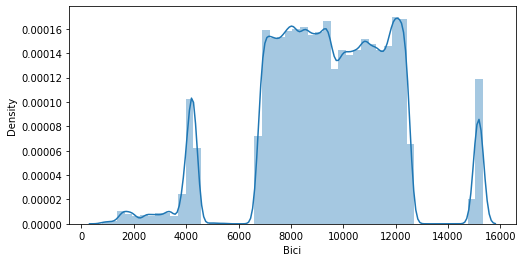

In [12]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (8, 4))
sns.distplot(df['Bici'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CPU times: user 3.13 s, sys: 362 ms, total: 3.49 s
Wall time: 2.89 s


<AxesSubplot:xlabel='Ciclo_EstacionArribo', ylabel='Density'>

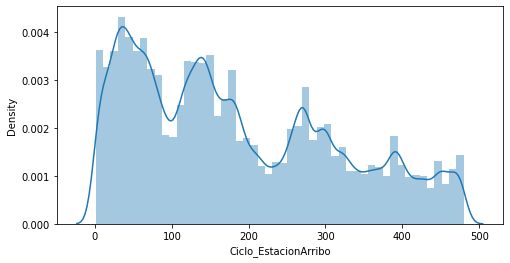

In [13]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (8, 4))
sns.distplot(df['Ciclo_EstacionArribo'])

### Reemplazar valores null

Se decide reemplazar los valores antes mencionados a partir de la media, ya que se considera que existen sesgos en la distribución 

In [14]:
%%time

df['Edad_Usuario'].fillna(df['Edad_Usuario'].median(), inplace = True)
df['Bici'].fillna(df['Edad_Usuario'].median(), inplace = True)
df['Ciclo_EstacionArribo'].fillna(df['Edad_Usuario'].median(), inplace = True)


print('Edad media: ', df['Edad_Usuario'].median())
print('Bici media: ', df['Bici'].median())
print('Estación media: ', df['Ciclo_EstacionArribo'].median())

Edad media:  33.0
Bici media:  9424.0
Estación media:  152.0
CPU times: user 106 ms, sys: 713 µs, total: 107 ms
Wall time: 102 ms


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114357 entries, 0 to 1114356
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Genero_Usuario         1114357 non-null  object 
 1   Edad_Usuario           1114357 non-null  float64
 2   Bici                   1114357 non-null  float64
 3   Ciclo_Estacion_Retiro  1103273 non-null  float64
 4   Fecha_Retiro           1103273 non-null  object 
 5   Hora_Retiro            1103273 non-null  object 
 6   Ciclo_EstacionArribo   1114357 non-null  float64
 7   Fecha Arribo           1103273 non-null  object 
 8   Hora_Arribo            1103273 non-null  object 
dtypes: float64(4), object(5)
memory usage: 76.5+ MB


# Pregunta 1.1

¿En qué horarios hay mayor afluencia y en qué estaciones?

Para responder a la pregunta 1.1, es necesario primero transformar el atributo de horarios a un formato de horario determinado, en este caso se elige un formato de hora, es decir, de 0-24. La razón de esto es que se considera que en lapsos de una hora sería posible establecer mejor la afluencia. 

__Nota:__ La pregunta 1.1 menciona la mayor afluencia en determinado horario, sin embargo; por afluencia se entiende la mayor cantidad de personas a una determinada hora, pero esto puede ser al momento de ir por la bicicleta o al momento de regresarla, por lo cual se toman los dos valores para dar formato al atributo del horario. Así mismo, la pregunta no especifica si se refiere a la mayor afluencia en estaciones de forma general, o a la mayor afleuncia en estaciones a partir de las horas de mayor afluencia.  

In [16]:
%%time

# se genera dos nuevas columnas en el DF con la hora de arribo y retiro 
df['Hora_Arribo_formato'] = pd.to_datetime(df['Hora_Arribo'], format='%H:%M:%S').dt.hour
df['Hora_Retiro_formato'] = pd.to_datetime(df['Hora_Retiro'], format='%H:%M:%S').dt.hour

df.shape

CPU times: user 4.52 s, sys: 5.8 ms, total: 4.53 s
Wall time: 4.51 s


(1114357, 11)

In [17]:
%%time

df['Hora_Arribo_formato'] = df['Hora_Arribo_formato'].astype('float64')
df['Hora_Retiro_formato'] = df['Hora_Retiro_formato'].astype('float64')

CPU times: user 10.2 ms, sys: 925 µs, total: 11.1 ms
Wall time: 7.99 ms


### Distribución de la Hoar de Arribo

Esto se realiza debido a que mas adelante se utlizará este dato, y es necesario reemplezar los valores null en este atributo 

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


CPU times: user 3.25 s, sys: 292 ms, total: 3.54 s
Wall time: 2.97 s


<AxesSubplot:xlabel='Hora_Arribo_formato', ylabel='Density'>

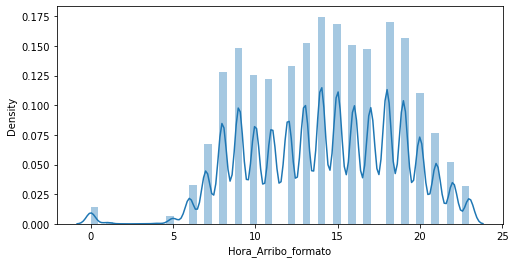

In [18]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize= (8, 4))
sns.distplot(df['Hora_Arribo_formato'])

### Reemplazar valor null 

Se reemplazan valores null en la Hora_Arribo_formato a partir de la media 

In [19]:
%%time

df['Hora_Arribo_formato'].fillna(df['Hora_Arribo_formato'].median(), inplace = True)

CPU times: user 16.4 ms, sys: 656 µs, total: 17.1 ms
Wall time: 14.6 ms


### Agrupar y contar 

Se realiza un agrupamiento y conteo a partir del horario de arribo y retiro y el atributo "Ciclo_EstacionArribo", el cual contienen la estación, con esto se puede saber el horario con la mayor afluencia, se sacan tambien porcentajes

In [20]:
%%time

# primer agrupamiento por la hora de arribo
df_horaArribo = df.groupby(['Hora_Arribo_formato'])['Ciclo_EstacionArribo'].count().reset_index().copy()

# se genera una columna con los porcentajes 
df_horaArribo['pct'] = [(i * 1.0) / df_horaArribo['Ciclo_EstacionArribo'].sum() for i in df_horaArribo['Ciclo_EstacionArribo']]

# se muestran los valores de mayor a menor 
df_horaArribo.sort_values(by='pct', ascending = False)

CPU times: user 25 ms, sys: 234 µs, total: 25.2 ms
Wall time: 21.6 ms


Hora_Arribo_formato  Ciclo_EstacionArribo       pct
14                 14.0                 99749  0.089513
18                 18.0                 86563  0.077680
15                 15.0                 85583  0.076800
19                 19.0                 79391  0.071244
13                 13.0                 77394  0.069452
16                 16.0                 76382  0.068544
9                   9.0                 75449  0.067706
17                 17.0                 74967  0.067274
12                 12.0                 67419  0.060500
8                   8.0                 65173  0.058485
10                 10.0                 63593  0.057067
11                 11.0                 61931  0.055576
20                 20.0                 55962  0.050219
21                 21.0                 39017  0.035013
7                   7.0                 34201  0.030691
22                 22.0                 26714  0.023973
6                   6.0                 16479  0.014788
23                 23.0                 16313  0.014639
0                   0.0                  7129  0.006397
5                   5.0                  3559  0.003194
1                   1.0                   870  0.000781
4                   4.0                   353  0.000317
2                   2.0                    84  0.000075
3                   3.0                    82  0.000074

In [21]:
%%time

# segundo agrupamiento por la hora de retiro
df_horaRetiro = df.groupby(['Hora_Retiro_formato'])['Ciclo_Estacion_Retiro'].count().reset_index().copy()

# se genera una columna con los porcentajes 
df_horaRetiro['pct'] = [(i * 1.0) / df_horaRetiro['Ciclo_Estacion_Retiro'].sum() for i in df_horaRetiro['Ciclo_Estacion_Retiro']]

# se muestran los valores de mayor a menor 
df_horaRetiro.sort_values(by='pct', ascending = False)

CPU times: user 14.8 ms, sys: 7.43 ms, total: 22.2 ms
Wall time: 19.5 ms


Hora_Retiro_formato  Ciclo_Estacion_Retiro       pct
16                 18.0                  88774  0.080464
12                 14.0                  88719  0.080414
13                 15.0                  83285  0.075489
11                 13.0                  79166  0.071756
15                 17.0                  75785  0.068691
14                 16.0                  74387  0.067424
6                   8.0                  74181  0.067237
17                 19.0                  73688  0.066790
7                   9.0                  73610  0.066720
10                 12.0                  70108  0.063545
9                  11.0                  64156  0.058151
8                  10.0                  63566  0.057616
18                 20.0                  50204  0.045505
5                   7.0                  40201  0.036438
19                 21.0                  35529  0.032203
20                 22.0                  23361  0.021174
4                   6.0                  19749  0.017900
21                 23.0                  13875  0.012576
0                   0.0                   5283  0.004788
3                   5.0                   5159  0.004676
2                   4.0                    442  0.000401
1                   1.0                     45  0.000041

### Respuesta 1.1

Las dos agrupaciones anteriores responden la primer parte de la pregunta, que es ¿en que horario hay mayor afluencia?

- __horario mayor afluencia:__ es de las 13:00  hasta las 20:00 horas, es decir que los horarios con mayor afluencia son 13:00, 14:00, 15:00, 16:00, 17:00, 18:00 y 19:00 horas, se encuentran dos __outliers__ tanto para los horarios de entrada como de salida con mas afluencia que son las 9:00 y 8:00 horas. 

La razón por la cual se consideran outliers estos dos horarios (8 y 9 horas) es debido a que ambos horarios tienen una afluencia similar o incluso mayor a los encontrados en el horario (13-20 horas), además, estos son horarios de la mañana (8:00 a 10:00 horas). Esto permite inferir que existe una afleuncia importante de usuarios en estas dos horas de la mañana, además de la afluencia encontrada en el horario de 13-20 horas. 


### Parte dos Respuesta 1.1

Para responder a la segunda parte de la pregunta 1.1 ¿En qué estaciones?, se realiza una nueva agrupación tomando como input el dato del horario de mayor afluencia, que en este caso es de las 13:00 y menor a las 20:00 horas

In [22]:
%%time

# se deja solo los horarios de mayor afluencia 
df_mAfluenciaA = df[df['Hora_Arribo_formato'] >= 13.0].copy()
df_mAfluenciaA = df_mAfluenciaA[df_mAfluenciaA['Hora_Arribo_formato'] < 20.0].copy()

print(df_mAfluenciaA.shape)
print(df_mAfluenciaA['Hora_Arribo_formato'].unique())

(580029, 11)
[13. 14. 15. 16. 17. 18. 19.]
CPU times: user 234 ms, sys: 110 ms, total: 344 ms
Wall time: 340 ms


In [23]:
%%time

# tercer agrupamiento por la estación y por arribo
df_mAfEstacionA = df_mAfluenciaA.groupby(['Ciclo_EstacionArribo'])['Hora_Arribo_formato'].count().reset_index().copy()
df_mAfEstacionA.sort_values(by='Hora_Arribo_formato', ascending = False)

CPU times: user 14.6 ms, sys: 406 µs, total: 15 ms
Wall time: 13.2 ms


Ciclo_EstacionArribo  Hora_Arribo_formato
32                   33.0                13387
268                 271.0                 6410
263                 266.0                 5469
0                     1.0                 4514
63                   64.0                 4326
..                    ...                  ...
450                 456.0                  142
406                 410.0                  121
217                 220.0                   88
436                 442.0                   69
210                 213.0                   63

[475 rows x 2 columns]

In [24]:
%%time

# se deja solo los horarios de mayor afluencia 
df_mAfluenciaR = df[df['Hora_Retiro_formato'] >= 13.0].copy()
df_mAfluenciaR = df_mAfluenciaR[df_mAfluenciaR['Hora_Retiro_formato'] < 20.0].copy()

print(df_mAfluenciaR.shape)
print(df_mAfluenciaR['Hora_Retiro_formato'].unique())

(563804, 11)
[19. 16. 13. 15. 18. 14. 17.]
CPU times: user 114 ms, sys: 60.2 ms, total: 175 ms
Wall time: 171 ms


In [25]:
%%time

# cuarto agrupamiento por la estación y el retiro 
df_mAfEstacionR = df_mAfluenciaR.groupby(['Ciclo_Estacion_Retiro'])['Hora_Retiro_formato'].count().reset_index().copy()
df_mAfEstacionR.sort_values(by='Hora_Retiro_formato', ascending = False)

CPU times: user 13.8 ms, sys: 0 ns, total: 13.8 ms
Wall time: 10.9 ms


Ciclo_Estacion_Retiro  Hora_Retiro_formato
26                    27.0                 4593
0                      1.0                 4482
40                    41.0                 3988
63                    64.0                 3944
179                  182.0                 3532
..                     ...                  ...
399                  403.0                  156
264                  267.0                  134
407                  411.0                  103
173                  176.0                  102
436                  442.0                   41

[475 rows x 2 columns]

# Resumen Respuesta 1.1

La mayor afluencia se da en los horarios de las 13:00 hasta antes de las 20:00 horas, es decir que los horarios con mayor afluencia tanto para el arribo como para el retiro son: 

- 13:00, 14:00, 15:00, 16:00, 17:00, 18:00 y 19:00 horas, 
    
Se decide tomar este rango de horarios porque en estos horarios se concentra aproximadamente cerca del 42% de la afluencia total. 

Así mismo, se encuentran dos outliers tanto para los horarios de arribo como de retiro con mas afluencia que son las 9:00 horas para los arribos y las 8:00 horas para los retiros, se decide no considerarlos ya que representan aproximadamente el %6 del total respectivamente. 

Dentro del rango de horario de mayor afluencia mencionado anteriormente, las estaciones con mayor afluencia son: 

- 271, 266, 1, 64 y 27 en el caso de los arribos
- 1, 27, 64, 41 y 182 en el caso de los retiros 



# Pregunta 1.2.


Método de aprendizaje no supervisado para encontrar perfiles de uso de las estaciones

Para resolver esta pregunta se siguen los siguientes pasos. 

>__1. Elegir modelo:__ se elige un modelo de agrupamiento (clustering) para representar los datos, ya que se considera que un agrupamiento es la mejor opción para generar perfiles de usuarios, el algoritmo se espcifica más adelante

>__2. Datos categóricos:__ convertir los datos categoricos a numéricos, esto porque para alimentar un modelo de agrupamiento, es necesairo que los datos esten en un fromato numérico 

>__3. Normalizar el tipo de dato:__ de origen, existen datos datetime, str, float64 e incluso int, el cual se genero al numericalizar el sexo de los usuarios, por lo cual, se elige un formato de numero para todos los datos (float64), ya que otros datos de origen tienen este tipo de dato es un formato con el cual se puede alimentar el modelo de agrupamiento 

>__4. Elegir el algoritmo:__ se elige KMeans por ser un algoritmo simple, que no utliza muchos recursos, y que permite de manera general resolver la pregunta 

> __5. Determinar número de grupos:__ ya que se usa KMeans, es necesario definir el número "k", esto se hace a aprtir del método Elbow

### Convertir datos categóricos

Se pasa el atributo "Genero_Usuario" a número para poder trabajar con el dataset 

In [26]:
%%time
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # instancia del label encoder 
df['Genero_Usuario_num'] = le.fit_transform(df['Genero_Usuario']) # pasar a número los datos categóricos 
df['Genero_Usuario_num'] = df['Genero_Usuario_num'].astype('float64') # pasar el tipo de dato a float64

df.shape

CPU times: user 197 ms, sys: 0 ns, total: 197 ms
Wall time: 199 ms


(1114357, 12)

### Pasar a nuevo DF 

Se generan dos dataframes nuevos separando los datos de arribo y retiro 

In [27]:
%%time

dfArribo = df[['Genero_Usuario_num', 'Edad_Usuario', 'Bici', 'Ciclo_EstacionArribo', 'Hora_Arribo_formato']].copy()
dfRetiro = df[['Genero_Usuario_num', 'Edad_Usuario', 'Bici', 'Ciclo_Estacion_Retiro', 'Hora_Retiro_formato']].copy()

print(dfArribo.shape)
print(dfRetiro.shape)

(1114357, 5)
(1114357, 5)
CPU times: user 55.5 ms, sys: 10.2 ms, total: 65.6 ms
Wall time: 62.4 ms


In [28]:
#feedback !https://pypi.org/project/scikit-learn-intelex/ le di un update a tu dockerfile 

### Método Elbow

Se utiliza este método para elegir el número optimo de clústers. La parte de la gráfica donde la línea es menos suave o cambia abruptamente es lo que forma un “codo”, ese número de clúster ayudará al momento de clasificar los datos.

In [ ]:
%%time
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

k1 = []
inertia_s1 = []

for i in tqdm(range(2,26)):
    k1.append(i)
    kmeans1 = KMeans(n_clusters=i, random_state=125, max_iter=100).fit(dfArribo)
    inertia_s1.append(kmeans1.inertia_)

# plot
plt.figure(figsize=(15,5))
plt.plot(k1, inertia_s1,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertia (SSE) vs. K Value')
plt.xlabel('K')
plt.ylabel('Inertia score (SSE)')

 17%|█▋        | 4/24 [00:19<01:44,  5.25s/it]

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
 33%|███▎      | 8/24 [01:07<03:07, 11.72s/it]

### Generar cluster KMeans

Se genera un cluster con k=5, esto porque se considera que la gráfica anterior cambia su curso de forma más abrupta entre el 4 y 5 del eje x

In [ ]:
%%time
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5)
dfArribo['cluster'] = cluster.fit_predict(dfArribo)

In [ ]:
%%time
dfArribo.head()

In [ ]:
# feedback !conda install -c plotly plotly

### Plots

Se generan plots para ver la distribución de los datos, y proceder así a contestar la pregunta 1.2

__Nota:__ Al correr la celda de abajo se puede ralentizar un poco el notebook, esto debido a que es un plot interactivo 

In [ ]:
%%time
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# creating subplot for the four attributes
fig = make_subplots(rows=3, cols=2, subplot_titles=("Genero_Usuario", "Edad_Usuario", 
                                                    "Estacion Arribo", "Hora Arribo", "Clusters"))

# volin plot para el género
fig.append_trace(go.Violin(x=dfArribo['Genero_Usuario_num'], name='Genero'), row=1, col=1)

# violin plot para la edad
fig.append_trace(go.Violin(x=dfArribo['Edad_Usuario'], name='Edad'), row=1, col=2)

# violin plot para estación arribo
fig.append_trace(go.Violin(x=dfArribo['Ciclo_EstacionArribo'], name='Estacion Arribo'), row=2, col=1)

# violin plot para hora arribo
fig.append_trace(go.Violin(x=dfArribo['Hora_Arribo_formato'], name='Hora Arribo'), row=2, col=2)

# violin plot para cluster
fig.append_trace(go.Violin(x=dfArribo['cluster'], name='Clusters'), row=3, col=1)

# mostrar el plot
fig.update_layout(height=600, width=900, title_text="Violin Subplots", template="simple_white")
fig.show()

### Agrupar 

Se realizna un par de agrupaciones para generar inferencias sobre los clusters

In [ ]:
%%time

df_1 = dfArribo.groupby(['cluster', 'Genero_Usuario_num'])['Ciclo_EstacionArribo'].size().reset_index()
df_2 = dfArribo.groupby(['Ciclo_EstacionArribo', 'cluster', 'Edad_Usuario'])['Genero_Usuario_num'].count().reset_index()

In [ ]:
%%time
import plotly.express as px

fig = px.bar(df_1, x='cluster', y='Ciclo_EstacionArribo', color = 'Genero_Usuario_num', width=500, height=300)
fig.show()

In [ ]:
%%time
import plotly.express as px


fig = px.scatter(dfArribo, x='Ciclo_EstacionArribo', y='Edad_Usuario', color = 'Genero_Usuario_num', 
                 facet_col="cluster",  width=900, height=600)
fig.show()

# Resumen Respuesta 1.2

1.2 Método de aprendizaje no supervizado para encontrar perfiles de eusuarios

>a. Explica qué método utilizaste y porqué: 
>>el método utilizado es KMeans, la razón es que este es un
algoritmo para generar clusters a partir de los datos, así mismo es un modelo sencillo de implementar y 
bajo en costo computacional.
	
>b. Describe detalladamente como decidiste el número de grupos. ¿Que criterio elegiste?, 
¿Porque? y de ¿que tipo?
>>El número de grupos se eleigio a partir del uso del método Elbow, siendo esto un método cuantitativo, 
la razón de elegirlo, es que es un método estandarizado y probado que permite conocer el número 
óptimo de clusters, la forma de hacerlo es graficando y visualizando una línea que cambia abruptamente 
formando aís un “codo”, ese cambio abrupto, es el número de clústers

>c. De los grupos encontrados, describe las características que se pueden inferir de ellos
>>De manera general se puede inferir que a partir de los clusters los hombres son los que utilizan 
	más el servicio a lo largo de las estaciones, casi 3 veces más que las mujeres, y que la distribución por 
	edad y estación, son también los hombres quienes hacen más uso del servicio. 
    Por último, en la distribución total, hay un mayor uso en el rango de edades 20-40 años, una mayor 
	concentración de usuarios en las estaciones 1-200, y una disminución significativa en el uso del 
	servicio en los horarios 00:00-07:00 horas

# 1.3 Modelo estadístico paramétrico

### Importar DF

Se importa un DF exportado en la pregunta 1.1 y 1.2, esto para no tener que correr el notebook desde el inicio y poder trabajar más rápido en esta sección, la exportación del archivo no se coloca en el notebook, pero el dataset si esta disponible 

In [ ]:
%%time
import pandas as pd

path_in = pathy +  '/input/' # el path donde se encuantran los archivos .cvs a importar 
path_out = pathy +  '/output/' # el path donde se exportan archivos 
print(pathy)
df = pd.read_csv(path_out + 'dfConcat.csv')
df.shape

### Tipo de datos

Se unifican los tipos de datos, ya que las fechas y strings aparecen como objeto 

In [ ]:
%%time
import datetime

##funcion para convertir los objetas en tipo de dato datetime
df['Genero_Usuario'] = df['Genero_Usuario'].astype(str)
df['Fecha_Retiro'] = pd.to_datetime(df['Fecha_Retiro'], format="%d/%m/%Y")
df['Fecha Arribo'] = pd.to_datetime(df['Fecha Arribo'], format="%d/%m/%Y")

### LLenar valores null 

Se llenan los valores null con la media para los atributos a utilizar

In [ ]:
%%time
import numpy as np

df['Fecha_Retiro'].fillna(df['Fecha_Retiro'].median(), inplace = True)
df['Ciclo_Estacion_Retiro'].fillna(df['Ciclo_Estacion_Retiro'].median(), inplace = True)

### Sort

Se acomoda el DF por fecha

In [ ]:
%%time

df.sort_values(by = 'Fecha_Retiro', inplace = True)

### Pasar datos a utilizar 

In [ ]:
%%time

dfp = df[['Fecha_Retiro', 'Ciclo_Estacion_Retiro']].copy()

### Agrupar 

In [ ]:
%%time

ctdf = (dfp.reset_index()
          .groupby(['Fecha_Retiro','Ciclo_Estacion_Retiro'], as_index=False).count().rename(columns={'index':'ct'}))

# Resúmen respuesta 1.3


Se generan plots para visualizar cada dos estaciones la tendencia los cuales se muestran a continuación, se colocan aquí las respuestas a cada una de las preguntas: 

- ¿En qué estaciones puedes observar una tendencia de uso a la alta?
    - Estaciones 3, 5, 7, 8, 9, 12, 13, 15, 20, 24
    
- ¿En qué estaciones puedes observar una tendencia de uso a la baja?
    - Estaciones 1, 2, 4, 6, 10, 11, 14, 16, 17, 18
    
- Demuestra tus conclusiones visualmente, e.g. puedes graficar las diez estaciones con mayor tendencia de uso a la alta y las diez estaciones con menortendencia de uso a la baja.
    - Se muestran en los siguientes gráficos

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn = ctdf[ctdf['Ciclo_Estacion_Retiro'] < 3].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 3].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 5].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 5].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 7].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 7].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 9].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 9].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 11].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 11].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 13].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 13].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 15].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 15].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 17].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 17].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 19].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 19].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 21].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)

In [ ]:
%%time
import seaborn as sns
from matplotlib import pyplot as plt

nn1 = ctdf[ctdf['Ciclo_Estacion_Retiro'] >= 23].copy()
nn1 = nn1[nn1['Ciclo_Estacion_Retiro'] < 25].copy()

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize =(10, 5))

# key gives the group name (i.e. category), data gives the actual values
for key, data in nn1.groupby('Ciclo_Estacion_Retiro'):

    data.plot(x='Fecha_Retiro', y='ct', ax=ax, label=key)